In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("heart_disease.csv")

# Display the first few rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Processing

In [2]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop(columns=['target'])  # Assuming 'target' is the column for heart disease presence
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Decision Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### Evaluate the Model

In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



### Visualize the Decision Tree

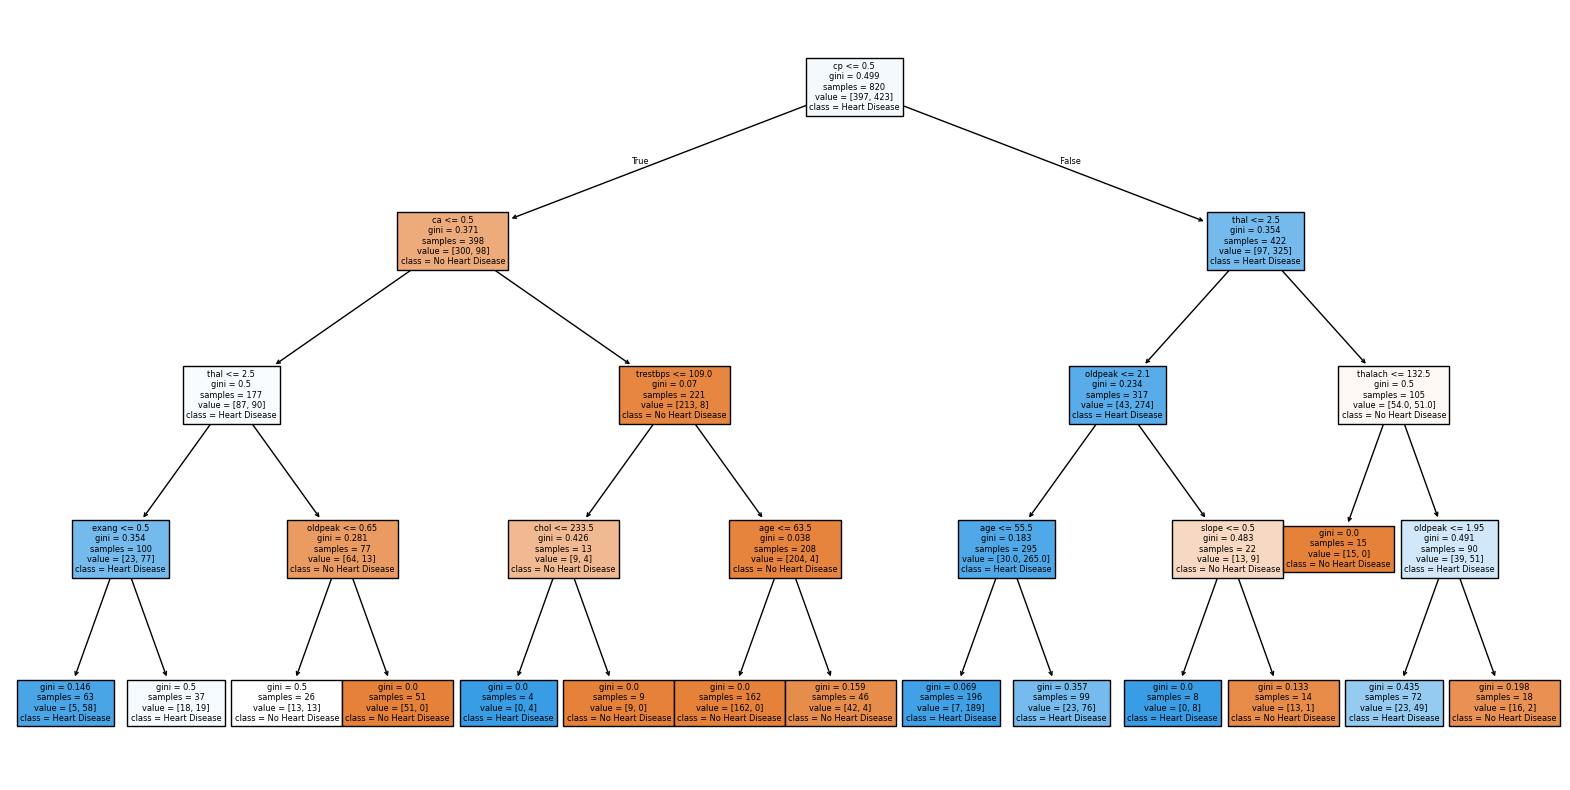

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.show()

### Visualizing Important Features

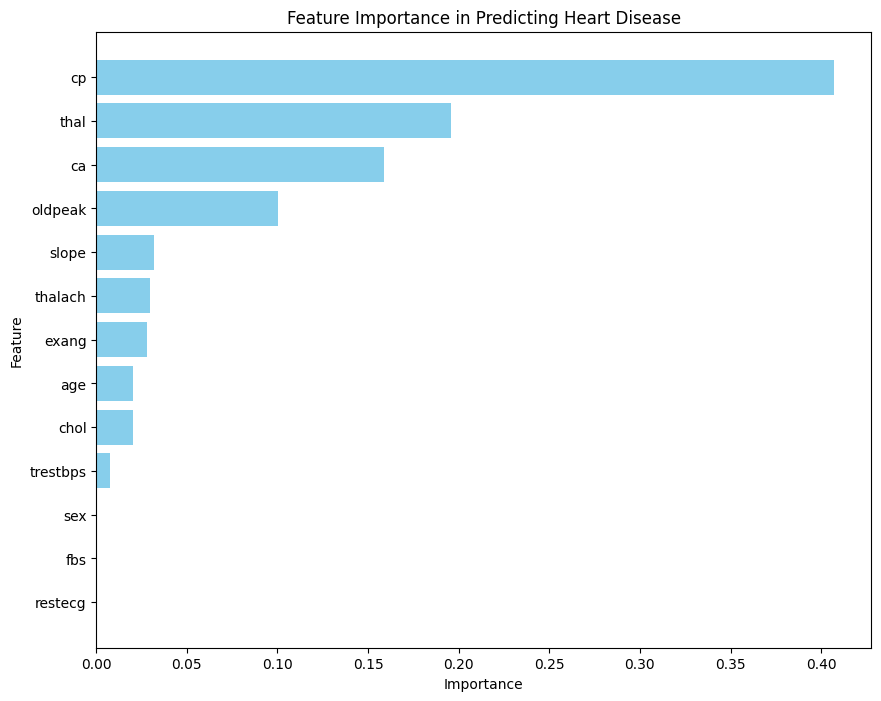

In [6]:
feature_importances = tree_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Heart Disease')
plt.show()